## Pandas ##
---

Aqui você conta uma historinha onde você irá imbutir seus códigos para analise de dados. 

Nesse exemplo, vamos analisar o ***dataset*** da taxa de cancelamentos de planos dos usuarios da empresa farmaceutica ***Umbrella Corporation***

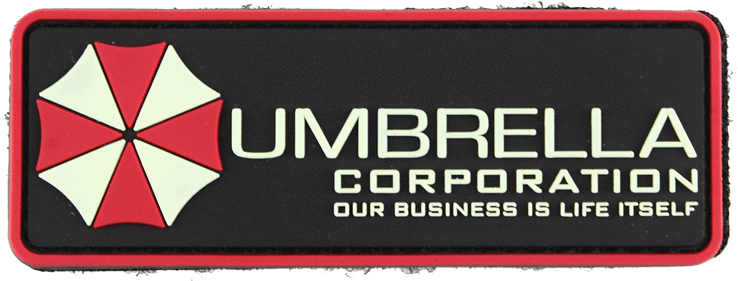

Trazendo os dados do __dataset__ para o notebook.

In [ ]:
import pandas as pd

#
tabela = pd.read_csv('cancelamentos.csv')

# mostra o dataset na tela
display(tabela)

Agora, vou eliminar da consulta dados desnecessário. Vou eliminar o ID do usuário.

In [ ]:
tabela = tabela.drop('CustomerID', axis=1)
display(tabela)

Vamos descobrir quantas linhas com informações vazias nós temos.

In [ ]:
display(tabela.info())

Vamos eliminar as celulas vazias da nossa consulta.

In [ ]:
tabela = tabela.dropna()
display(tabela.info())

Vamos contar quantos usuarios cancelaram e quantos não cancelaram;

In [ ]:
display(tabela['cancelou'].value_counts())

In [ ]:
display(tabela['cancelou'].value_counts(normalize=True).map('{:.2%}'.format))

Proxima analise de dados vai ser para verificar a duração dos contratos.

In [ ]:
display(tabela['duracao_contrato'].value_counts())
display(tabela['duracao_contrato'].value_counts(normalize=True).map('{:.2%}'.format))

Vamos agrupar as informações da duração do contrato.

In [ ]:
display(tabela.groupby('duracao_contrato').mean(numeric_only=True))

Vamos eliminar os dados dos contratos mensais.

In [ ]:
tabela = tabela[tabela['duracao_contrato'] != 'Monthly']
display(tabela)
display(tabela['cancelou'].value_counts())
display(tabela['cancelou'].value_counts(normalize=True).map('{:.2%}'.format))


Vamos dar uma olhada nos tipos de planos de assinaturas.

In [ ]:
display(tabela['assinatura'].value_counts(normalize=True).map('{:.2%}'.format))
display(tabela.groupby('assinatura').mean(numeric_only=True))

Vamos passar a analisar os dados das assinaturas olhando os graficos 

In [ ]:
import plotly.express as px
for coluna in tabela.columns:
    grafico = px.histogram(tabela, x=coluna, color="cancelou", width=600)
    grafico.show()

Achamos as anamolias: ligações de call center e dias de atraso. Os clientes com mais de 30 dias de atraso cancelaram as assinaturas. Enquanto os clientes que fizeram mais de 5 ligações para o call center, todos cancelaram suas assinaturas.

In [ ]:
tabela = tabela[tabela['ligacoes_callcenter'] < 5]
tabela = tabela[tabela['dias_atraso'] <= 20]

display(tabela)
display(tabela['cancelou'].value_counts())
display(tabela['cancelou'].value_counts(normalize=True).map('{:.2%}'.format))